In [1]:
# Filtering warnings
import warnings
warnings.filterwarnings("ignore")

# Payment Date Prediction 


### Importing related Libraries 

In [2]:
#For Data mainpulation
import numpy as np
import pandas as pd
import datetime

In [3]:
#For EDA
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as m
import plotly.express as px
sns.set_theme(style="darkgrid")

In [4]:
#For Model building

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### Store the dataset into the Dataframe


In [5]:
df0 = pd.read_csv('dataset.csv')

### Check the shape of the dataframe


In [6]:
print('Shape of Dataframe -> ', end = '')
df0.shape

Shape of Dataframe -> 

(50000, 19)

### Check the Detail information of the dataframe

In [7]:
print('Dimension of Dataframe -> ', end = '')
df0.ndim

Dimension of Dataframe -> 

2

In [8]:
print('Size of Dataframe -> ', end = '')
df0.size

Size of Dataframe -> 

950000

In [9]:
print('Information of Dataframe ->')
df0.info()

Information of Dataframe ->
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50000 non-null  object 
 1   cust_number             50000 non-null  object 
 2   name_customer           50000 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50000 non-null  float64
 5   doc_id                  50000 non-null  float64
 6   posting_date            50000 non-null  object 
 7   document_create_date    50000 non-null  int64  
 8   document_create_date.1  50000 non-null  int64  
 9   due_in_date             50000 non-null  float64
 10  invoice_currency        50000 non-null  object 
 11  document type           50000 non-null  object 
 12  posting_id              50000 non-null  float64
 13  area_business           0 non-null      float64
 14  total_open

In [10]:
print('Number of unique values in each column of dataframe ->')
df0.nunique()

Number of unique values in each column of dataframe ->


business_code                 6
cust_number                1425
name_customer              4197
clear_date                  403
buisness_year                 2
doc_id                    48839
posting_date                506
document_create_date        507
document_create_date.1      506
due_in_date                 547
invoice_currency              2
document type                 2
posting_id                    1
area_business                 0
total_open_amount         44349
baseline_create_date        506
cust_payment_terms           74
invoice_id                48833
isOpen                        2
dtype: int64

### Display All the column names

In [11]:
df0.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')

### Describe the entire dataset

In [12]:
df0.describe()

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,posting_id,area_business,total_open_amount,baseline_create_date,invoice_id,isOpen
count,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.0,0.0,50000.000000,5.000000e+04,4.999400e+04,50000.000000
mean,2019.305700,2.012238e+09,2.019351e+07,2.019354e+07,2.019368e+07,1.0,NaN,32337.021651,2.019354e+07,2.011340e+09,0.200000
std,0.460708,2.885235e+08,4.496041e+03,4.482134e+03,4.470614e+03,0.0,NaN,39205.975231,4.482701e+03,2.766335e+08,0.400004
min,2019.000000,1.928502e+09,2.018123e+07,2.018123e+07,2.018122e+07,1.0,NaN,0.720000,2.018121e+07,1.928502e+09,0.000000
25%,2019.000000,1.929342e+09,2.019050e+07,2.019051e+07,2.019052e+07,1.0,NaN,4928.312500,2.019050e+07,1.929342e+09,0.000000
50%,2019.000000,1.929964e+09,2.019091e+07,2.019091e+07,2.019093e+07,1.0,NaN,17609.010000,2.019091e+07,1.929964e+09,0.000000
75%,2020.000000,1.930619e+09,2.020013e+07,2.020013e+07,2.020022e+07,1.0,NaN,47133.635000,2.020013e+07,1.930619e+09,0.000000
max,2020.000000,9.500000e+09,2.020052e+07,2.020052e+07,2.020071e+07,1.0,NaN,668593.360000,2.020052e+07,2.960636e+09,1.000000


# Data Cleaning

- Show top 5 records from the dataset

In [13]:
df0.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200125,20200126,20200210.0,USD,RV,1.0,NaN,54273.28,20200126.0,NAH4,1.930438e+09,0
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,20190722,20190722,20190811.0,USD,RV,1.0,NaN,79656.60,20190722.0,NAD1,1.929646e+09,0
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,20190914,20190914,20190929.0,USD,RV,1.0,NaN,2253.86,20190914.0,NAA8,1.929874e+09,0
3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,20200330,20200330,20200410.0,CAD,RV,1.0,NaN,3299.70,20200331.0,CA10,2.960623e+09,1
4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,20191113,20191113,20191128.0,USD,RV,1.0,NaN,33133.29,20191113.0,NAH4,1.930148e+09,0


### Display the Null values percentage against every columns (compare to the total number of records)

- Output expected : area_business - 100% null, clear_data = 20% null, invoice_id = 0.12% null

In [14]:
null_percent = df0.isnull().sum() * 100 / len(df0)
null_percent_df = pd.DataFrame({'percent_missing': null_percent})

In [15]:
null_percent_df

,percent_missing
business_code,0.000
cust_number,0.000
name_customer,0.000
clear_date,20.000
buisness_year,0.000
doc_id,0.000
posting_date,0.000
document_create_date,0.000
document_create_date.1,0.000
due_in_date,0.000


### Display Invoice_id and Doc_Id

- Note - Many of the would have same invoice_id and doc_id


In [16]:
df0[['invoice_id','doc_id']]

,invoice_id,doc_id
0,1.930438e+09,1.930438e+09
1,1.929646e+09,1.929646e+09
2,1.929874e+09,1.929874e+09
3,2.960623e+09,2.960623e+09
4,1.930148e+09,1.930148e+09
...,...,...
49995,1.930797e+09,1.930797e+09
49996,1.929744e+09,1.929744e+09
49997,1.930537e+09,1.930537e+09
49998,1.930199e+09,1.930199e+09


#### Write a code to check - 'baseline_create_date',"document_create_date",'document_create_date.1' - these columns are almost same.

- Please note, if they are same, we need to drop them later



In [17]:
df1 = df0.copy()

In [18]:
df1['baseline_vs_doc_create'] = np.where(df1['baseline_create_date'] == df1['document_create_date'], True, False)

In [19]:
df1.loc[df1['baseline_vs_doc_create'] == False]
#in 34037 rows  out of 50000, baseline and doc create date are not same

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,baseline_vs_doc_create
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200125,20200126,20200210.0,USD,RV,1.0,NaN,54273.28,20200126.0,NAH4,1.930438e+09,0,False
3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,20200330,20200330,20200410.0,CAD,RV,1.0,NaN,3299.70,20200331.0,CA10,2.960623e+09,1,False
5,CA02,0140106181,THE corporation,2019-12-04 00:00:00,2019.0,2.960581e+09,2019-09-20,20190920,20190920,20191004.0,CAD,RV,1.0,NaN,22225.84,20190924.0,CA10,2.960581e+09,0,False
6,U001,0200769623,WAL-MAR in,2019-11-12 00:00:00,2019.0,1.930083e+09,2019-11-01,20191031,20191101,20191116.0,USD,RV,1.0,NaN,7358.49,20191101.0,NAH4,1.930083e+09,0,False
7,U001,0200744019,TARG us,NaN,2020.0,1.930659e+09,2020-03-19,20200318,20200319,20200403.0,USD,RV,1.0,NaN,11173.02,20200319.0,NAA8,1.930659e+09,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,U001,0200561861,CO corporation,NaN,2020.0,1.930797e+09,2020-04-21,20200417,20200421,20200506.0,USD,RV,1.0,NaN,3187.86,20200421.0,NAA8,1.930797e+09,1,False
49996,U001,0200769623,WAL-MAR co,2019-09-03 00:00:00,2019.0,1.929744e+09,2019-08-15,20190814,20190815,20190830.0,USD,RV,1.0,NaN,6766.54,20190815.0,NAH4,1.929744e+09,0,False
49997,U001,0200772595,SAFEW associates,2020-03-05 00:00:00,2020.0,1.930537e+09,2020-02-19,20200218,20200219,20200305.0,USD,RV,1.0,NaN,6120.86,20200219.0,NAA8,1.930537e+09,0,False
49998,U001,0200726979,BJ'S llc,2019-12-12 00:00:00,2019.0,1.930199e+09,2019-11-27,20191126,20191127,20191212.0,USD,RV,1.0,NaN,63.48,20191127.0,NAA8,1.930199e+09,0,False


In [20]:
df1['baseline_vs_doc_create.1'] = np.where(df1['baseline_create_date'] == df1['document_create_date.1'], True, False)

In [21]:
df1.loc[df1['baseline_vs_doc_create.1'] == False]
# In 5548 rows out of 50000, baseline and doc create date.1 are not same.

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,...,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,baseline_vs_doc_create,baseline_vs_doc_create.1
3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,20200330,20200330,20200410.0,...,RV,1.0,NaN,3299.70,20200331.0,CA10,2.960623e+09,1,False,False
5,CA02,0140106181,THE corporation,2019-12-04 00:00:00,2019.0,2.960581e+09,2019-09-20,20190920,20190920,20191004.0,...,RV,1.0,NaN,22225.84,20190924.0,CA10,2.960581e+09,0,False,False
15,U001,0200353024,DECA corporation,NaN,2020.0,1.930817e+09,2020-04-23,20200423,20200423,20200426.0,...,RV,1.0,NaN,3726.06,20200416.0,NAM2,1.930817e+09,1,False,False
44,CA02,CCU001,KRAFT trust,2019-05-31 00:00:00,2019.0,2.960542e+09,2019-04-12,20190412,20190412,20190519.0,...,RV,1.0,NaN,31715.46,20190414.0,NAG2,2.960542e+09,0,False,False
45,U001,0200803720,DEC corp,NaN,2020.0,1.930698e+09,2020-03-25,20200325,20200325,20200408.0,...,RV,1.0,NaN,138.60,20200316.0,NAM4,1.930698e+09,1,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49949,CA02,0140104409,LOB co,NaN,2020.0,2.960631e+09,2020-04-25,20200425,20200425,20200515.0,...,RV,1.0,NaN,93386.81,20200505.0,CA10,2.960631e+09,1,False,False
49955,CA02,0140106408,WAL-M,2020-02-21 00:00:00,2020.0,2.960611e+09,2020-01-28,20200128,20200128,20200208.0,...,RV,1.0,NaN,1082.69,20200129.0,CA10,2.960611e+09,0,False,False
49966,U001,0200020431,DEC foundation,2019-04-26 00:00:00,2019.0,1.929174e+09,2019-04-19,20190419,20190419,20190426.0,...,RV,1.0,NaN,15611.62,20190416.0,NAM2,1.929174e+09,0,False,False
49978,U001,200020431,DEC associates,2019-07-12 00:00:00,2019.0,1.929572e+09,2019-07-03,20190703,20190703,20190708.0,...,RV,1.0,NaN,3273.31,20190701.0,NAM1,1.929572e+09,0,False,False


In [22]:
df1['doc_create_vs_doc_create.1'] = np.where(df1['document_create_date'] == df1['document_create_date.1'], True, False)

In [23]:
df1.loc[df1['doc_create_vs_doc_create.1'] == False]
#doc_create_date.1 is the normalised version of doc_create_date
#In 28768 rows out of 50000, they are not same.

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,...,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen,baseline_vs_doc_create,baseline_vs_doc_create.1,doc_create_vs_doc_create.1
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200125,20200126,20200210.0,...,1.0,NaN,54273.28,20200126.0,NAH4,1.930438e+09,0,False,True,False
6,U001,0200769623,WAL-MAR in,2019-11-12 00:00:00,2019.0,1.930083e+09,2019-11-01,20191031,20191101,20191116.0,...,1.0,NaN,7358.49,20191101.0,NAH4,1.930083e+09,0,False,True,False
7,U001,0200744019,TARG us,NaN,2020.0,1.930659e+09,2020-03-19,20200318,20200319,20200403.0,...,1.0,NaN,11173.02,20200319.0,NAA8,1.930659e+09,1,False,True,False
8,U001,0200769623,WAL-MAR corp,2019-06-18 00:00:00,2019.0,1.929440e+09,2019-06-07,20190605,20190607,20190622.0,...,1.0,NaN,15995.04,20190607.0,NAH4,1.929440e+09,0,False,True,False
9,U001,0200762301,C&S WH systems,2019-03-06 00:00:00,2019.0,1.928819e+09,2019-02-20,20190219,20190220,20190307.0,...,1.0,NaN,28.63,20190220.0,NAC6,1.928819e+09,0,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,0200762301,C&S WH trust,2019-07-25 00:00:00,2019.0,1.929601e+09,2019-07-10,20190709,20190710,20190725.0,...,1.0,NaN,84780.40,20190710.0,NAC6,1.929601e+09,0,False,True,False
49995,U001,0200561861,CO corporation,NaN,2020.0,1.930797e+09,2020-04-21,20200417,20200421,20200506.0,...,1.0,NaN,3187.86,20200421.0,NAA8,1.930797e+09,1,False,True,False
49996,U001,0200769623,WAL-MAR co,2019-09-03 00:00:00,2019.0,1.929744e+09,2019-08-15,20190814,20190815,20190830.0,...,1.0,NaN,6766.54,20190815.0,NAH4,1.929744e+09,0,False,True,False
49997,U001,0200772595,SAFEW associates,2020-03-05 00:00:00,2020.0,1.930537e+09,2020-02-19,20200218,20200219,20200305.0,...,1.0,NaN,6120.86,20200219.0,NAA8,1.930537e+09,0,False,True,False


#### Please check, Column 'posting_id' is constant columns or not


In [24]:
df0['posting_id'].nunique()

1

<AxesSubplot:>

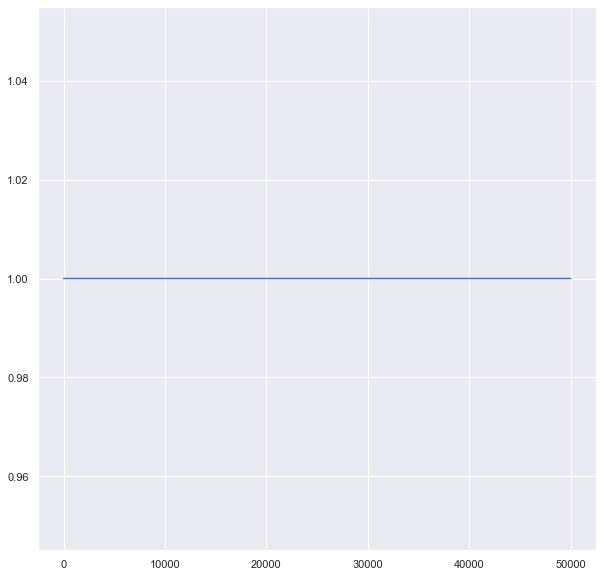

In [25]:
df1['posting_id'].plot(figsize = (10,10))

#### Please check 'isOpen' is a constant column and relevant column for this project or not

In [26]:
df0['isOpen'].nunique()

2

In [27]:
df0['isOpen'].value_counts()

0    40000
1    10000
Name: isOpen, dtype: int64

([<matplotlib.patches.Wedge at 0x212bed808b0>,
 [Text(-0.9708204196655013, 0.7053422663930613, '0'),
  Text(0.9708204526849543, -0.7053422209456772, '1')],
 [Text(-0.5663119114715424, 0.41144965539595235, '80.0%'),
  Text(0.56631193073289, -0.4114496288849784, '20.0%')])

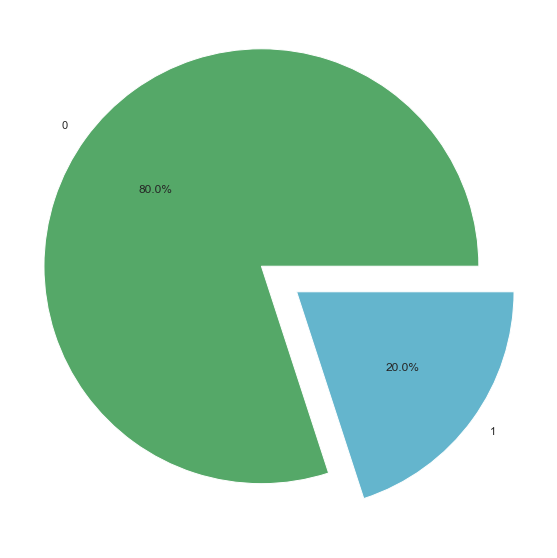

In [28]:
plt.subplots(figsize = (10,10))
x = ['0','1']
y = df0['isOpen'].value_counts()
plt.pie(y,
        labels = x,
        colors = ['g','c'],
        shadow = False,
        explode = (0.1,0.1),
        autopct = '%1.1f%%'
        )

### Write the code to drop all the following columns from the dataframe

- 'area_business'
- "posting_id"
- "invoice_id"
- "document_create_date"
- "isOpen"
- 'document type' 
- 'document_create_date.1

In [29]:
df0.drop(axis = 1, labels = ['area_business','posting_id', 'invoice_id','document_create_date','isOpen','document type','document_create_date.1'],inplace = True)

### Please check from the dataframe whether all the columns are removed or not 

In [30]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   business_code         50000 non-null  object 
 1   cust_number           50000 non-null  object 
 2   name_customer         50000 non-null  object 
 3   clear_date            40000 non-null  object 
 4   buisness_year         50000 non-null  float64
 5   doc_id                50000 non-null  float64
 6   posting_date          50000 non-null  object 
 7   due_in_date           50000 non-null  float64
 8   invoice_currency      50000 non-null  object 
 9   total_open_amount     50000 non-null  float64
 10  baseline_create_date  50000 non-null  float64
 11  cust_payment_terms    50000 non-null  object 
dtypes: float64(5), object(7)
memory usage: 4.6+ MB


### Show all the Duplicate rows from the dataframe

In [31]:
df0.duplicated().value_counts()

False    48839
True      1161
dtype: int64

### Display the Number of Duplicate Rows

In [32]:
# temp_df0 -> datframe consisting of duplicated datas
temp_df0 = df0[df0.duplicated()].copy()
temp_df0.shape

(1161, 12)

### Drop all the Duplicate Rows

In [33]:
# df1 -> dataframe with duplicated datas removed
df0.drop_duplicates(inplace=True)
print('After dropping the duplicates, number of rows in dataframe -> ',end = '')
df0.shape

After dropping the duplicates, number of rows in dataframe -> 

(48839, 12)

#### Now check for all duplicate rows now

- Note - It must be 0 by now

In [34]:
df0.duplicated().value_counts()
# as the number of duplicates are now 0, we get only count of the value where duplicated == false

False    48839
dtype: int64

### Check for the number of Rows and Columns in your dataset

In [190]:
df0.shape

(48839, 11)

### Find out the total count of null values in each columns

In [36]:
df0.isnull().sum()

business_code              0
cust_number                0
name_customer              0
clear_date              9681
buisness_year              0
doc_id                     0
posting_date               0
due_in_date                0
invoice_currency           0
total_open_amount          0
baseline_create_date       0
cust_payment_terms         0
dtype: int64

#Data type Conversion 

### Please check the data type of each column of the dataframe

In [37]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48839 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   business_code         48839 non-null  object 
 1   cust_number           48839 non-null  object 
 2   name_customer         48839 non-null  object 
 3   clear_date            39158 non-null  object 
 4   buisness_year         48839 non-null  float64
 5   doc_id                48839 non-null  float64
 6   posting_date          48839 non-null  object 
 7   due_in_date           48839 non-null  float64
 8   invoice_currency      48839 non-null  object 
 9   total_open_amount     48839 non-null  float64
 10  baseline_create_date  48839 non-null  float64
 11  cust_payment_terms    48839 non-null  object 
dtypes: float64(5), object(7)
memory usage: 4.8+ MB


### Check the datatype format of below columns

- clear_date  
- posting_date
- due_in_date 
- baseline_create_date

In [38]:
df0[['clear_date','posting_date','due_in_date','baseline_create_date']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48839 entries, 0 to 49999
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   clear_date            39158 non-null  object 
 1   posting_date          48839 non-null  object 
 2   due_in_date           48839 non-null  float64
 3   baseline_create_date  48839 non-null  float64
dtypes: float64(2), object(2)
memory usage: 1.9+ MB


### converting date columns into date time formats

- clear_date  
- posting_date
- due_in_date 
- baseline_create_date


- **Note - You have to convert all these above columns into "%Y%m%d" format**

In [39]:
df0['clear_date'] = pd.to_datetime(df0['clear_date']).dt.date

In [40]:
df0['clear_date']= pd.to_datetime(df0['clear_date'])

In [41]:
df0['posting_date'] = pd.to_datetime(df0['posting_date'])

df0['due_in_date'] = pd.to_datetime(df0['due_in_date'].astype(str), format='%Y%m%d')

df0['baseline_create_date'] = pd.to_datetime(df0['baseline_create_date'].astype(str), format='%Y%m%d')

### Please check the datatype of all the columns after conversion of the above 4 columns

In [42]:
df0[['clear_date','posting_date','due_in_date','baseline_create_date']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48839 entries, 0 to 49999
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   clear_date            39158 non-null  datetime64[ns]
 1   posting_date          48839 non-null  datetime64[ns]
 2   due_in_date           48839 non-null  datetime64[ns]
 3   baseline_create_date  48839 non-null  datetime64[ns]
dtypes: datetime64[ns](4)
memory usage: 1.9 MB


#### the invoice_currency column contains two different categories, USD and CAD

- Please do a count of each currency 

In [43]:
df0['invoice_currency'].value_counts()

USD    45011
CAD     3828
Name: invoice_currency, dtype: int64

([<matplotlib.patches.Wedge at 0x212c0286550>,
 [Text(-1.1638035572540537, 0.2925085983741516, 'USD'),
  Text(1.1638035504073956, -0.29250862561494007, 'CAD')],
 [Text(-0.678885408398198, 0.17063001571825506, '92.2%'),
  Text(0.678885404404314, -0.17063003160871504, '7.8%')])

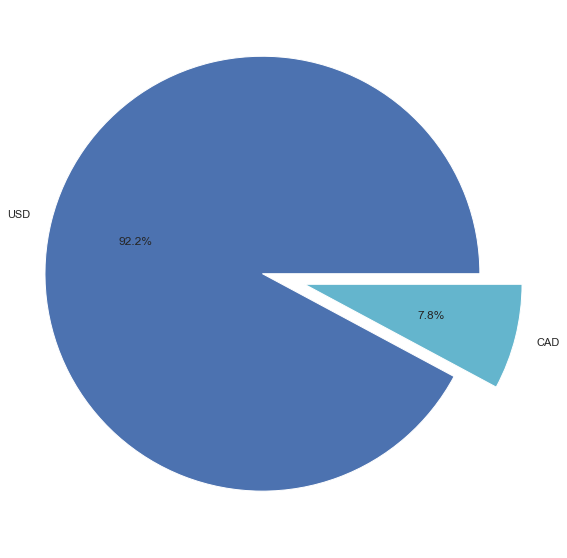

In [44]:
# print the pie chart showing the ratio of USD vs CAD invoice currency
x = ['USD','CAD']
y = df0['invoice_currency'].value_counts()
plt.subplots(figsize= [10,10])
plt.pie(y,
       labels = x,
       colors = ['b','c'],
       shadow = False,
       explode = (0.1,0.1),
       autopct = '%1.1f%%'
       )

#### display the "total_open_amount" column value

In [45]:
df0['total_open_amount']

0        54273.28
1        79656.60
2         2253.86
3         3299.70
4        33133.29
           ...   
49995     3187.86
49996     6766.54
49997     6120.86
49998       63.48
49999     1790.30
Name: total_open_amount, Length: 48839, dtype: float64

### Convert all CAD into USD currency of "total_open_amount" column

- 1 CAD = 0.7 USD
- Create a new column i.e "converted_usd" and store USD and convered CAD to USD

In [46]:
# Method:- storing data with Invoice currency =  CAD in one dataframe and ones with USD in another

# adding column exchange rate in both dataframes with values = 0.7 for df with CAD and 1.0 for df with USD

# concatenating both dataframe together and then multiplying [total_open_amount] and [exchange_rate] columns

# dropping exchange rate column from final dataframe

In [47]:
df5 = df0.loc[df0['invoice_currency'] == 'CAD']

In [48]:
df6 = df0.loc[df0['invoice_currency'] == 'USD']

In [49]:
df5['exchange_rate'] = 0.7
df6['exchange_rate'] = 1.0

In [50]:
#appending all dataframes together
frames = [df5,df6]
df7 = pd.concat(frames)

In [51]:
df7['converted_usd'] = df7['total_open_amount']*df7['exchange_rate']

In [52]:
df0 = df7.copy()

In [53]:
df0.drop(axis = 1, labels = 'exchange_rate',inplace = True)

In [54]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48839 entries, 3 to 49999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         48839 non-null  object        
 1   cust_number           48839 non-null  object        
 2   name_customer         48839 non-null  object        
 3   clear_date            39158 non-null  datetime64[ns]
 4   buisness_year         48839 non-null  float64       
 5   doc_id                48839 non-null  float64       
 6   posting_date          48839 non-null  datetime64[ns]
 7   due_in_date           48839 non-null  datetime64[ns]
 8   invoice_currency      48839 non-null  object        
 9   total_open_amount     48839 non-null  float64       
 10  baseline_create_date  48839 non-null  datetime64[ns]
 11  cust_payment_terms    48839 non-null  object        
 12  converted_usd         48839 non-null  float64       
dtypes: datetime64[ns

### Display the new "converted_usd" column values

In [55]:
df0['converted_usd']

3         2309.790
5        15558.088
25       64982.589
29       33889.296
44       22200.822
           ...    
49995     3187.860
49996     6766.540
49997     6120.860
49998       63.480
49999     1790.300
Name: converted_usd, Length: 48839, dtype: float64

### Display year wise total number of record 

- Note -  use "buisness_year" column for this 

In [56]:
df0.sort_values(by =['buisness_year'], axis=0, ascending=True, inplace = True, kind='quicksort', na_position='last', ignore_index=False, key=None)

In [57]:
df0.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms,converted_usd
49999,U001,0200020431,DEC corp,2019-01-15,2019.0,1.928576e+09,2019-01-05,2019-01-24,USD,1790.30,2019-01-01,NAM4,1790.30
22513,U001,0200238407,NAT,2019-03-08,2019.0,1.928794e+09,2019-02-18,2019-03-05,USD,8560.89,2019-02-18,NAA8,8560.89
41705,U001,0200769623,WAL-MAR foundation,2019-09-06,2019.0,1.929379e+09,2019-05-24,2019-06-08,USD,3484.06,2019-05-24,NAH4,3484.06
22508,U001,0200793568,SUPE us,2019-06-17,2019.0,1.929405e+09,2019-05-30,2019-06-14,USD,160950.00,2019-05-30,NAA8,160950.00
22507,U001,0200772670,ASSOCIAT llc,2019-06-13,2019.0,1.929359e+09,2019-05-24,2019-06-08,USD,861.54,2019-05-24,NAU5,861.54


### Write the code to delete the following columns 

- 'invoice_currency'
- 'total_open_amount', 

In [58]:
df0.drop(axis = 1, labels = ['invoice_currency','total_open_amount'], inplace = True)

### Write a code to check the number of columns in dataframe

In [59]:
df0.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'due_in_date',
       'baseline_create_date', 'cust_payment_terms', 'converted_usd'],
      dtype='object')

# Splitting the Dataset 

### Look for all columns containing null value

- Note - Output expected is only one column 

In [60]:
null_percent_new = df0.isnull().sum() * 100 / len(df0)
null_percent_new_df = pd.DataFrame({'percent_missing': null_percent})

In [61]:
null_percent_new_df

,percent_missing
business_code,0.000
cust_number,0.000
name_customer,0.000
clear_date,20.000
buisness_year,0.000
doc_id,0.000
posting_date,0.000
document_create_date,0.000
document_create_date.1,0.000
due_in_date,0.000


#### Find out the number of null values from the column that you got from the above code

In [62]:
df0['clear_date'].isnull().value_counts()

False    39158
True      9681
Name: clear_date, dtype: int64

### On basis of the above column we are spliting data into dataset

- First dataframe (refer that as maindata) only containing the rows, that have NO NULL data in that column ( This is going to be our train dataset ) 
- Second dataframe (refer that as nulldata) that contains the columns, that have Null data in that column ( This is going to be our test dataset ) 

In [63]:
maindata = df0[df0['clear_date'].notna()]
nulldata = df0[df0['clear_date'].isna()]

### Check the number of Rows and Columns for both the dataframes 

In [64]:
maindata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39158 entries, 49999 to 22554
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         39158 non-null  object        
 1   cust_number           39158 non-null  object        
 2   name_customer         39158 non-null  object        
 3   clear_date            39158 non-null  datetime64[ns]
 4   buisness_year         39158 non-null  float64       
 5   doc_id                39158 non-null  float64       
 6   posting_date          39158 non-null  datetime64[ns]
 7   due_in_date           39158 non-null  datetime64[ns]
 8   baseline_create_date  39158 non-null  datetime64[ns]
 9   cust_payment_terms    39158 non-null  object        
 10  converted_usd         39158 non-null  float64       
dtypes: datetime64[ns](4), float64(3), object(4)
memory usage: 3.6+ MB


In [65]:
nulldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9681 entries, 37588 to 23250
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         9681 non-null   object        
 1   cust_number           9681 non-null   object        
 2   name_customer         9681 non-null   object        
 3   clear_date            0 non-null      datetime64[ns]
 4   buisness_year         9681 non-null   float64       
 5   doc_id                9681 non-null   float64       
 6   posting_date          9681 non-null   datetime64[ns]
 7   due_in_date           9681 non-null   datetime64[ns]
 8   baseline_create_date  9681 non-null   datetime64[ns]
 9   cust_payment_terms    9681 non-null   object        
 10  converted_usd         9681 non-null   float64       
dtypes: datetime64[ns](4), float64(3), object(4)
memory usage: 907.6+ KB


### Display the 5 records from maindata and nulldata dataframes

In [66]:
maindata.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
49999,U001,0200020431,DEC corp,2019-01-15,2019.0,1.928576e+09,2019-01-05,2019-01-24,2019-01-01,NAM4,1790.30
22513,U001,0200238407,NAT,2019-03-08,2019.0,1.928794e+09,2019-02-18,2019-03-05,2019-02-18,NAA8,8560.89
41705,U001,0200769623,WAL-MAR foundation,2019-09-06,2019.0,1.929379e+09,2019-05-24,2019-06-08,2019-05-24,NAH4,3484.06
22508,U001,0200793568,SUPE us,2019-06-17,2019.0,1.929405e+09,2019-05-30,2019-06-14,2019-05-30,NAA8,160950.00
22507,U001,0200772670,ASSOCIAT llc,2019-06-13,2019.0,1.929359e+09,2019-05-24,2019-06-08,2019-05-24,NAU5,861.54


In [67]:
nulldata.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
37588,U001,0200744019,TARG associates,NaT,2020.0,1.930619e+09,2020-03-08,2020-03-23,2020-03-08,NAA8,7664.54
37793,U001,0200418007,AM trust,NaT,2020.0,1.930850e+09,2020-05-06,2020-05-21,2020-05-06,NAA8,11638.80
44616,U001,0200875006,KROGER us,NaT,2020.0,1.930819e+09,2020-04-23,2020-05-08,2020-04-23,NAA8,63607.17
43286,U001,0200762301,C&S WH llc,NaT,2020.0,1.930789e+09,2020-04-16,2020-05-01,2020-04-16,NAC6,7614.94
43277,U001,CCCA02,KRAFT associates,NaT,2020.0,1.930651e+09,2020-03-21,2020-04-25,2020-03-21,NAG2,55736.45


## Considering the **maindata**

#### Generate a new column "Delay" from the existing columns

- Note - You are expected to create a new column 'Delay' from two existing columns, "clear_date" and "due_in_date" 
- Formula - Delay = clear_date - due_in_date

In [68]:
maindata['Delay'] = maindata['clear_date'] - maindata['due_in_date']
maindata['Delay']

49999   -9 days
22513    3 days
41705   90 days
22508    3 days
22507    5 days
          ...  
23381   -4 days
23375    1 days
23373    6 days
23372    3 days
22554    1 days
Name: Delay, Length: 39158, dtype: timedelta64[ns]

### Generate a new column "avgdelay" from the existing columns

- Note - You are expected to make a new column "avgdelay" by grouping "name_customer" column with reapect to mean of the "Delay" column.
- This new column "avg_delay" is meant to store "customer_name" wise delay
- groupby('name_customer')['Delay'].mean(numeric_only=False)
- Display the new "avg_delay" column

In [69]:
avgdelay = pd.DataFrame(maindata.groupby(['name_customer'])['Delay'].mean(numeric_only=False))
avgdelay

,Delay
name_customer,
11078 us,17 days 00:00:00
17135 associates,-10 days +00:00:00
17135 llc,-3 days +00:00:00
236008 associates,-3 days +00:00:00
99 CE,2 days 00:00:00
...,...
YEN BROS corp,0 days 00:00:00
YEN BROS corporation,-1 days +12:00:00
YEN BROS llc,-2 days +00:00:00


You need to add the "avg_delay" column with the maindata, mapped with "name_customer" column

 - Note - You need to use map function to map the avgdelay with respect to "name_customer" column

In [70]:
maindata['avg_delay'] = maindata['name_customer'].map(avgdelay['Delay'])

### Observe that the "avg_delay" column is in days format. You need to change the format into seconds

- Days_format :  17 days 00:00:00
- Format in seconds : 1641600.0

In [71]:
maindata['avg_delay'] = maindata['avg_delay'].dt.total_seconds()

### Display the maindata dataframe 

In [72]:
maindata

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Delay,avg_delay
49999,U001,0200020431,DEC corp,2019-01-15,2019.0,1.928576e+09,2019-01-05,2019-01-24,2019-01-01,NAM4,1790.30,-9 days,-337147.826087
22513,U001,0200238407,NAT,2019-03-08,2019.0,1.928794e+09,2019-02-18,2019-03-05,2019-02-18,NAA8,8560.89,3 days,259200.000000
41705,U001,0200769623,WAL-MAR foundation,2019-09-06,2019.0,1.929379e+09,2019-05-24,2019-06-08,2019-05-24,NAH4,3484.06,90 days,-188792.307692
22508,U001,0200793568,SUPE us,2019-06-17,2019.0,1.929405e+09,2019-05-30,2019-06-14,2019-05-30,NAA8,160950.00,3 days,261818.181818
22507,U001,0200772670,ASSOCIAT llc,2019-06-13,2019.0,1.929359e+09,2019-05-24,2019-06-08,2019-05-24,NAU5,861.54,5 days,200160.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23381,U001,0200769623,WAL-MAR foundation,2020-02-04,2020.0,1.930427e+09,2020-01-24,2020-02-08,2020-01-24,NAH4,1983.35,-4 days,-188792.307692
23375,U001,0200726979,BJ'S us,2020-01-27,2020.0,1.930395e+09,2020-01-11,2020-01-26,2020-01-11,NAA8,821.38,1 days,138240.000000
23373,U001,0100031704,DELHAIZE in,2020-02-19,2020.0,1.930451e+09,2020-01-29,2020-02-13,2020-01-29,NAA8,69357.34,6 days,140400.000000
23372,U001,0200764795,SYSCO co,2020-01-27,2020.0,1.930371e+09,2020-01-09,2020-01-24,2020-01-09,NAA8,26571.20,3 days,126955.102041


### Since you have created the "avg_delay" column from "Delay" and "clear_date" column, there is no need of these two columns anymore 

- You are expected to drop "Delay" and "clear_date" columns from maindata dataframe 

In [73]:
maindata.drop(axis = 1, labels = ['Delay','clear_date'],inplace = True)
maindata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39158 entries, 49999 to 22554
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         39158 non-null  object        
 1   cust_number           39158 non-null  object        
 2   name_customer         39158 non-null  object        
 3   buisness_year         39158 non-null  float64       
 4   doc_id                39158 non-null  float64       
 5   posting_date          39158 non-null  datetime64[ns]
 6   due_in_date           39158 non-null  datetime64[ns]
 7   baseline_create_date  39158 non-null  datetime64[ns]
 8   cust_payment_terms    39158 non-null  object        
 9   converted_usd         39158 non-null  float64       
 10  avg_delay             39158 non-null  float64       
dtypes: datetime64[ns](3), float64(4), object(4)
memory usage: 3.6+ MB


# Splitting of Train and the Test Data

### You need to split the "maindata" columns into X and y dataframe

- Note - y should have the target column i.e. "avg_delay" and the other column should be in X

- X is going to hold the source fields and y will be going to hold the target fields

In [74]:
X = maindata.copy()
X.drop(axis = 1, inplace = True, labels = ['avg_delay'])
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39158 entries, 49999 to 22554
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         39158 non-null  object        
 1   cust_number           39158 non-null  object        
 2   name_customer         39158 non-null  object        
 3   buisness_year         39158 non-null  float64       
 4   doc_id                39158 non-null  float64       
 5   posting_date          39158 non-null  datetime64[ns]
 6   due_in_date           39158 non-null  datetime64[ns]
 7   baseline_create_date  39158 non-null  datetime64[ns]
 8   cust_payment_terms    39158 non-null  object        
 9   converted_usd         39158 non-null  float64       
dtypes: datetime64[ns](3), float64(3), object(4)
memory usage: 3.3+ MB


In [75]:
y = maindata['avg_delay']

#### You are expected to split both the dataframes into train and test format in 60:40 ratio 

- Note - The expected output should be in "X_train", "X_loc_test", "y_train", "y_loc_test" format 

In [76]:
X_train, X_loc_test, y_train, y_loc_test = train_test_split(X, y, test_size=.40, shuffle=False,random_state=42)

### Please check for the number of rows and columns of all the new dataframes (all 4)

In [77]:
X_train.shape, X_loc_test.shape

((23494, 10), (15664, 10))

In [78]:
y_train.shape, y_loc_test.shape

((23494,), (15664,))

### Now you are expected to split the "X_loc_test" and "y_loc_test" dataset into "Test" and "Validation" (as the names given below) dataframe with 50:50 format 

- Note - The expected output should be in "X_val", "X_test", "y_val", "y_test" format

In [79]:
X_val, X_test, y_val, y_test = train_test_split(X_loc_test, y_loc_test, test_size=.50, shuffle=False,random_state=42)

### Please check for the number of rows and columns of all the 4 dataframes 

In [80]:
X_val.shape, X_test.shape

((7832, 10), (7832, 10))

In [81]:
y_val.shape, y_test.shape

((7832,), (7832,))

# Exploratory Data Analysis (EDA) 

### Distribution Plot of the target variable (use the dataframe which contains the target field)

- Note - You are expected to make a distribution plot for the target variable 

<AxesSubplot:ylabel='Density'>

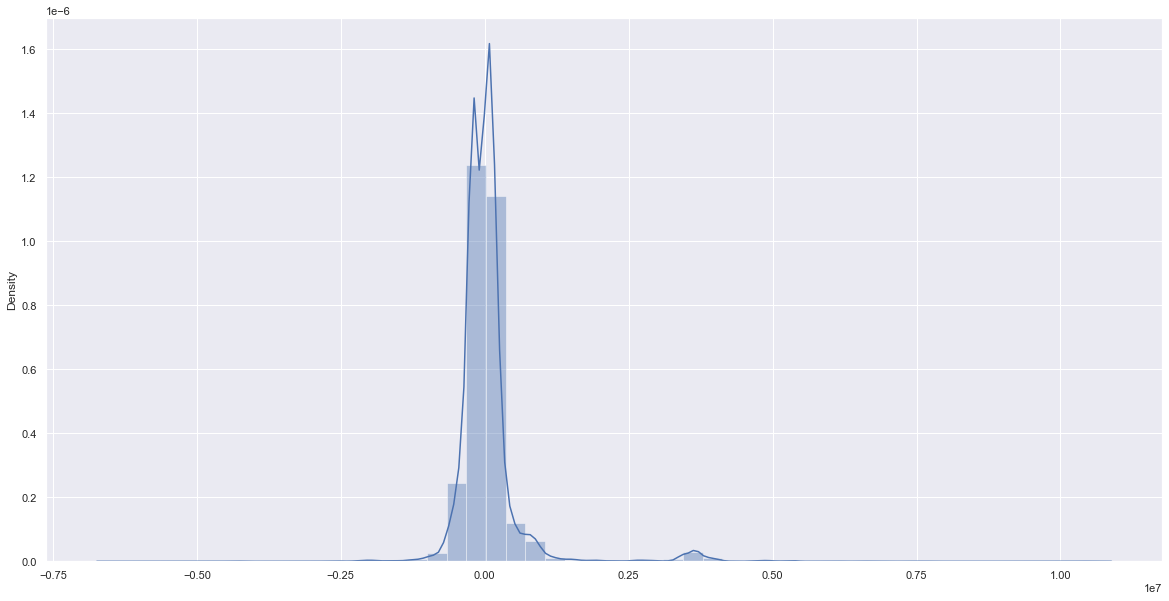

In [82]:
plt.subplots(figsize=(20,10))
sns.distplot(x = y_train)

### You are expected to group the X_train dataset on 'name_customer' column with 'doc_id' in the x_train set

### Need to store the outcome into a new dataframe 

- Note code given for groupby statement- X_train.groupby(by=['name_customer'], as_index=False)['doc_id'].count()

In [83]:
temp_df = pd.DataFrame(X_train.groupby(by=['name_customer'], as_index=False)['doc_id'].count())

In [84]:
temp_df

,name_customer,doc_id
0,11078 us,1
1,99 CE associates,1
2,99 CE co,1
3,99 CE corporation,2
4,99 CE foundation,3
...,...,...
3011,Y H llc,1
3012,Y H systems,3
3013,YEN BROS,1
3014,YEN BROS corporation,1


### You can make another distribution plot of the "doc_id" column from x_train

<AxesSubplot:xlabel='doc_id', ylabel='Density'>

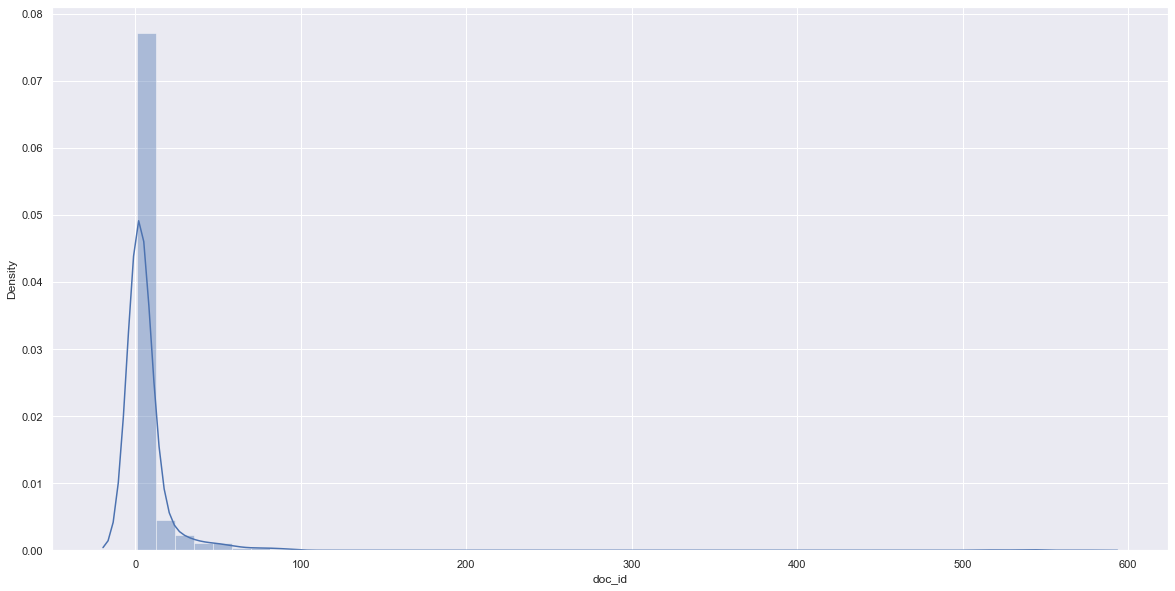

In [85]:
plt.subplots(figsize=(20,10))
sns.distplot(temp_df['doc_id'])

#### Create a Distribution plot only for business_year and a seperate distribution plot of "business_year" column along with the doc_id" column


<AxesSubplot:xlabel='buisness_year', ylabel='Density'>

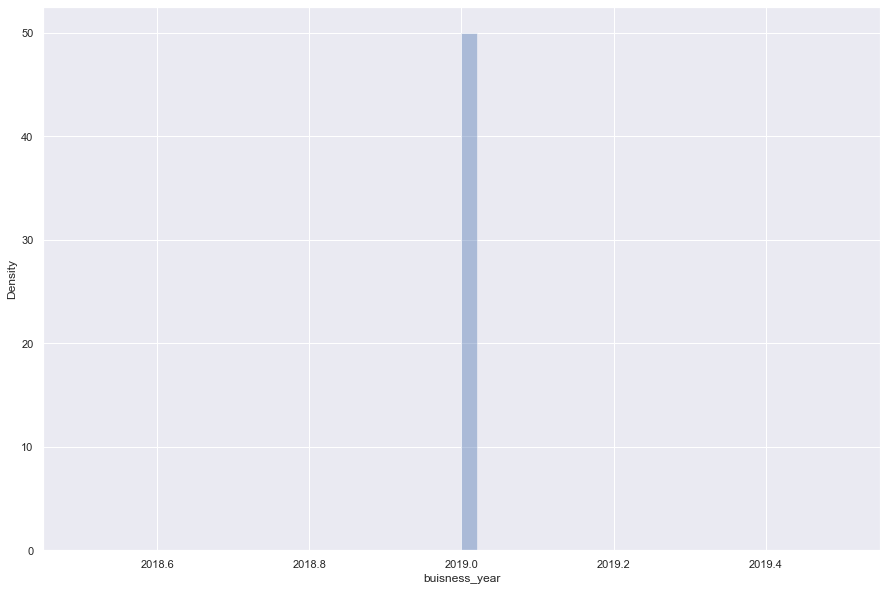

In [86]:
plt.subplots(figsize=(15,10))
sns.distplot(X_train['buisness_year'])

<AxesSubplot:ylabel='Density'>

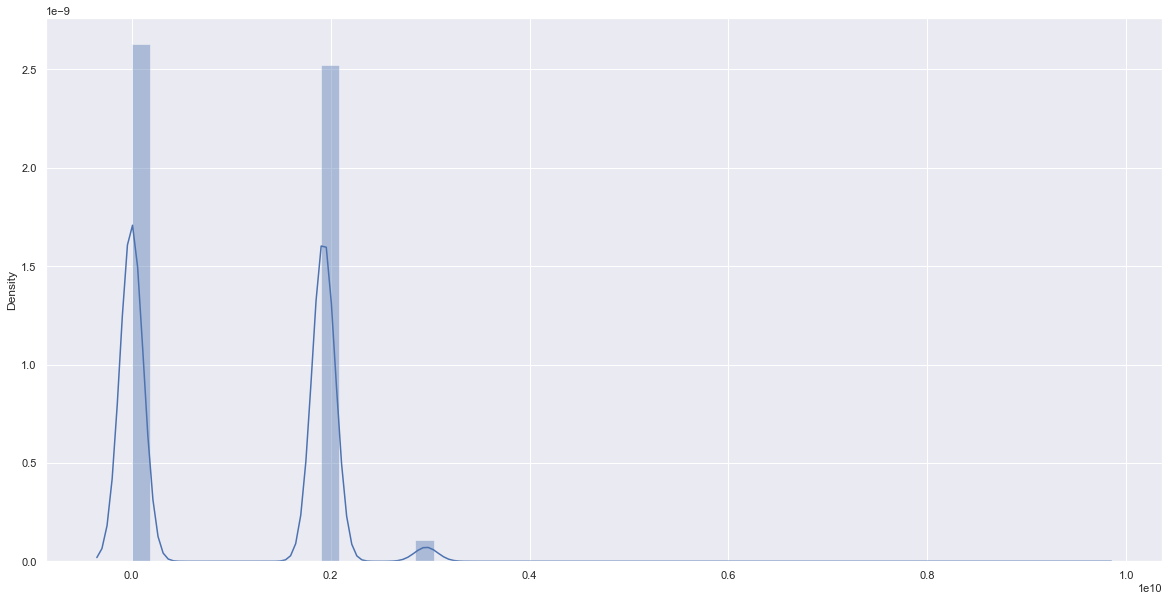

In [87]:
plt.subplots(figsize=(20,10))
sns.distplot(X_train[['buisness_year','doc_id']])

# Feature Engineering 

### Display and describe the X_train dataframe 

In [88]:
X_train

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
49999,U001,0200020431,DEC corp,2019.0,1.928576e+09,2019-01-05,2019-01-24,2019-01-01,NAM4,1790.300
22513,U001,0200238407,NAT,2019.0,1.928794e+09,2019-02-18,2019-03-05,2019-02-18,NAA8,8560.890
41705,U001,0200769623,WAL-MAR foundation,2019.0,1.929379e+09,2019-05-24,2019-06-08,2019-05-24,NAH4,3484.060
22508,U001,0200793568,SUPE us,2019.0,1.929405e+09,2019-05-30,2019-06-14,2019-05-30,NAA8,160950.000
22507,U001,0200772670,ASSOCIAT llc,2019.0,1.929359e+09,2019-05-24,2019-06-08,2019-05-24,NAU5,861.540
...,...,...,...,...,...,...,...,...,...,...
49898,U001,0200769623,WAL-MAR systems,2019.0,1.929874e+09,2019-09-15,2019-09-30,2019-09-15,NAH4,14406.450
49897,U001,0200763814,SYSCO F trust,2019.0,1.929214e+09,2019-04-29,2019-05-14,2019-04-29,NAA8,30891.640
49896,U001,0200769623,WAL-MAR in,2019.0,1.928672e+09,2019-01-25,2019-02-09,2019-01-25,NAH4,56763.900
4414,CA02,0140105963,KEYBRA foundation,2019.0,2.960576e+09,2019-08-26,2019-09-06,2019-08-27,CA10,24833.067


In [89]:
X_train.describe()

,buisness_year,doc_id,converted_usd
count,23494.0,2.349400e+04,23494.000000
mean,2019.0,1.974806e+09,30486.279704
std,0.0,2.283825e+08,36159.374542
min,2019.0,1.928502e+09,4.380000
25%,2019.0,1.929071e+09,4457.835000
50%,2019.0,1.929570e+09,16830.975000
75%,2019.0,1.929960e+09,45070.382500
max,2019.0,9.500000e+09,668593.360000


#### The "business_code" column inside X_train, is a categorical column, so you need to perform Labelencoder on that particular column

- Note - call the Label Encoder from sklearn library and use the fit() function on "business_code" column
- Note - Please fill in the blanks (two) to complete this code

In [90]:
from sklearn.preprocessing import LabelEncoder
business_coder = LabelEncoder()
business_coder.fit(X_train['business_code'])

LabelEncoder()

#### You are expected to store the value into a new column i.e. "business_code_enc"

- Note - For Training set you are expected to use fit_trainsform()
- Note - For Test set you are expected to use the trainsform()
- Note - For Validation set you are expected to use the trainsform()


- Partial code is provided, please fill in the blanks 

In [91]:
X_train['business_code_enc'] = business_coder.fit_transform(X_train['business_code'])

In [92]:
X_val['business_code_enc'] = business_coder.transform(X_val['business_code'])
X_test['business_code_enc'] = business_coder.transform(X_test['business_code'])

### Display "business_code" and "business_code_enc" together from X_train dataframe 

In [93]:
X_train[['business_code_enc','business_code']]

,business_code_enc,business_code
49999,1,U001
22513,1,U001
41705,1,U001
22508,1,U001
22507,1,U001
...,...,...
49898,1,U001
49897,1,U001
49896,1,U001
4414,0,CA02


#### Create a function called "custom" for dropping the columns 'business_code' from train, test and validation dataframe

- Note - Fill in the blank to complete the code

In [94]:
def custom(col ,traindf = X_train,valdf = X_val,testdf = X_test):
    traindf.drop(col, axis =1,inplace=True)
    valdf.drop(col,axis=1 , inplace=True)
    testdf.drop(col,axis=1 , inplace=True)

    return traindf,valdf ,testdf

### Call the function by passing the column name which needed to be dropped from train, test and validation dataframes. Return updated dataframes to be stored in X_train ,X_val, X_test  

- Note = Fill in the blank to complete the code 

In [95]:
X_train ,X_val, X_test = custom(['business_code'])

### Manually replacing str values with numbers, Here we are trying manually replace the customer numbers with some specific values like, 'CCCA' as 1, 'CCU' as 2 and so on. Also we are converting the datatype "cust_number" field to int type.

- We are doing it for all the three dataframes as shown below. This is fully completed code. No need to modify anything here 



In [96]:
X_train['cust_number'] = X_train['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
X_test['cust_number'] = X_test['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
X_val['cust_number'] = X_val['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)


#### It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]. Unknown will be added in fit and transform will take care of new item. It gives unknown class id.

#### This will fit the encoder for all the unique values and introduce unknown value

- Note - Keep this code as it is, we will be using this later on.  

In [97]:
#For encoding unseen labels
class EncoderExt(object):
    def __init__(self):
        self.label_encoder = LabelEncoder()
    def fit(self, data_list):
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_
        return self
    def transform(self, data_list):
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]
        return self.label_encoder.transform(new_data_list)

### Use the user define Label Encoder function called "EncoderExt" for the "name_customer" column

- Note - Keep the code as it is, no need to change

In [98]:
label_encoder = EncoderExt()
label_encoder.fit(X_train['name_customer'])
X_train['name_customer_enc']=label_encoder.transform(X_train['name_customer'])
X_val['name_customer_enc']=label_encoder.transform(X_val['name_customer'])
X_test['name_customer_enc']=label_encoder.transform(X_test['name_customer'])

### As we have created the a new column "name_customer_enc", so now drop "name_customer" column from all three dataframes

- Note - Keep the code as it is, no need to change

In [99]:
X_train ,X_val, X_test = custom(['name_customer'])

### Using Label Encoder for the "cust_payment_terms" column

- Note - Keep the code as it is, no need to change

In [100]:
label_encoder1 = EncoderExt()
label_encoder1.fit(X_train['cust_payment_terms'])
X_train['cust_payment_terms_enc']=label_encoder1.transform(X_train['cust_payment_terms'])
X_val['cust_payment_terms_enc']=label_encoder1.transform(X_val['cust_payment_terms'])
X_test['cust_payment_terms_enc']=label_encoder1.transform(X_test['cust_payment_terms'])

In [101]:
X_train ,X_val, X_test = custom(['cust_payment_terms'])

## Check the datatype of all the columns of Train, Test and Validation dataframes realted to X

- Note - You are expected yo use dtype

In [102]:
X_train.dtypes

cust_number                        int32
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int32
name_customer_enc                  int32
cust_payment_terms_enc             int32
dtype: object

In [103]:
X_test.dtypes

cust_number                        int32
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int32
name_customer_enc                  int32
cust_payment_terms_enc             int32
dtype: object

In [104]:
X_val.dtypes

cust_number                        int32
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int32
name_customer_enc                  int32
cust_payment_terms_enc             int32
dtype: object

### From the above output you can notice their are multiple date columns with datetime format

### In order to pass it into our model, we need to convert it into float format

### You need to extract day, month and year from the "posting_date" column 

1.   Extract days from "posting_date" column and store it into a new column "day_of_postingdate" for train, test and validation dataset 
2.   Extract months from "posting_date" column and store it into a new column "month_of_postingdate" for train, test and validation dataset
3.   Extract year from "posting_date" column and store it into a new column "year_of_postingdate" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year






In [105]:
X_train['day_of_postingdate'] = X_train['posting_date'].dt.day
X_train['month_of_postingdate'] = X_train['posting_date'].dt.month
X_train['year_of_postingdate'] = X_train['posting_date'].dt.year

X_val['day_of_postingdate'] = X_val['posting_date'].dt.day
X_val['month_of_postingdate'] = X_val['posting_date'].dt.month
X_val['year_of_postingdate'] = X_val['posting_date'].dt.year


X_test['day_of_postingdate'] = X_test['posting_date'].dt.day
X_test['month_of_postingdate'] = X_test['posting_date'].dt.month
X_test['year_of_postingdate'] = X_test['posting_date'].dt.year



### pass the "posting_date" column into the Custom function for train, test and validation dataset

In [106]:
X_train ,X_val, X_test = custom(['posting_date'])

### You need to extract day, month and year from the "baseline_create_date" column 

1.   Extract days from "baseline_create_date" column and store it into a new column "day_of_createdate" for train, test and validation dataset 
2.   Extract months from "baseline_create_date" column and store it into a new column "month_of_createdate" for train, test and validation dataset
3.   Extract year from "baseline_create_date" column and store it into a new column "year_of_createdate" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year


- Note - Do as it is been shown in the previous two code boxes

### Extracting Day, Month, Year for 'baseline_create_date' column

In [107]:
X_train['day_of_createdate'] = X_train['baseline_create_date'].dt.day
X_train['month_of_createdate'] = X_train['baseline_create_date'].dt.month
X_train['year_of_createdate'] = X_train['baseline_create_date'].dt.year

X_val['day_of_createdate'] = X_val['baseline_create_date'].dt.day
X_val['month_of_createdate'] = X_val['baseline_create_date'].dt.month
X_val['year_of_createdate'] = X_val['baseline_create_date'].dt.year

X_test['day_of_createdate'] = X_test['baseline_create_date'].dt.day
X_test['month_of_createdate'] = X_test['baseline_create_date'].dt.month
X_test['year_of_createdate'] = X_test['baseline_create_date'].dt.year


### pass the "baseline_create_date" column into the Custom function for train, test and validation dataset

In [108]:
X_train ,X_val, X_test = custom(['baseline_create_date'])

### You need to extract day, month and year from the "due_in_date" column 

1.   Extract days from "due_in_date" column and store it into a new column "day_of_due" for train, test and validation dataset 
2.   Extract months from "due_in_date" column and store it into a new column "month_of_due" for train, test and validation dataset
3.   Extract year from "due_in_date" column and store it into a new column "year_of_due" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year

- Note - Do as it is been shown in the previous code

In [109]:
X_train['day_of_due'] = X_train['due_in_date'].dt.day
X_train['month_of_due'] = X_train['due_in_date'].dt.month
X_train['year_of_due'] = X_train['due_in_date'].dt.year

X_val['day_of_due'] = X_val['due_in_date'].dt.day
X_val['month_of_due'] = X_val['due_in_date'].dt.month
X_val['year_of_due'] = X_val['due_in_date'].dt.year

X_test['day_of_due'] = X_test['due_in_date'].dt.day
X_test['month_of_due'] = X_test['due_in_date'].dt.month
X_test['year_of_due'] = X_test['due_in_date'].dt.year


pass the "due_in_date" column into the Custom function for train, test and validation dataset

In [110]:
X_train ,X_val, X_test = custom(['due_in_date'])

### Check for the datatypes for train, test and validation set again

- Note - all the data type should be in either int64 or float64 format 


In [111]:
X_train.dtypes

cust_number                 int32
buisness_year             float64
doc_id                    float64
converted_usd             float64
business_code_enc           int32
name_customer_enc           int32
cust_payment_terms_enc      int32
day_of_postingdate          int64
month_of_postingdate        int64
year_of_postingdate         int64
day_of_createdate           int64
month_of_createdate         int64
year_of_createdate          int64
day_of_due                  int64
month_of_due                int64
year_of_due                 int64
dtype: object

In [112]:
X_val.dtypes

cust_number                 int32
buisness_year             float64
doc_id                    float64
converted_usd             float64
business_code_enc           int32
name_customer_enc           int32
cust_payment_terms_enc      int32
day_of_postingdate          int64
month_of_postingdate        int64
year_of_postingdate         int64
day_of_createdate           int64
month_of_createdate         int64
year_of_createdate          int64
day_of_due                  int64
month_of_due                int64
year_of_due                 int64
dtype: object

In [113]:
X_test.dtypes

cust_number                 int32
buisness_year             float64
doc_id                    float64
converted_usd             float64
business_code_enc           int32
name_customer_enc           int32
cust_payment_terms_enc      int32
day_of_postingdate          int64
month_of_postingdate        int64
year_of_postingdate         int64
day_of_createdate           int64
month_of_createdate         int64
year_of_createdate          int64
day_of_due                  int64
month_of_due                int64
year_of_due                 int64
dtype: object

# Feature Selection

### Filter Method

- Calling the VarianceThreshold Function 
- Note - Keep the code as it is, no need to change 

In [114]:
from sklearn.feature_selection import VarianceThreshold
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_train)
len(X_train.columns[constant_filter.get_support()])

15

- Note - Keep the code as it is, no need to change 


In [115]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[constant_filter.get_support()]]
print(len(constant_columns))

1


- transpose the feature matrice
- print the number of duplicated features
- select the duplicated features columns names

- Note - Keep the code as it is, no need to change 


In [116]:
x_train_T = X_train.T
print(x_train_T.duplicated().sum())
duplicated_columns = x_train_T[x_train_T.duplicated()].index.values

0


### Filtering depending upon correlation matrix value
- We have created a function called handling correlation which is going to return fields based on the correlation matrix value with a threshold of 0.8

- Note - Keep the code as it is, no need to change 

In [117]:
def handling_correlation(X_train,threshold=0.8):
    corr_features = set()
    corr_matrix = X_train.corr()
    for i in range(len(corr_matrix .columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >threshold:
                colname = corr_matrix.columns[i]
                corr_features.add(colname)
    return list(corr_features)

- Note : Here we are trying to find out the relevant fields, from X_train
- Please fill in the blanks to call handling_correlation() function with a threshold value of 0.85

In [118]:
train = X_train.copy()
handling_correlation(train.copy(),0.85)

['month_of_due',
 'year_of_createdate',
 'month_of_createdate',
 'day_of_createdate']

### Heatmap for X_train

- Note - Keep the code as it is, no need to change

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

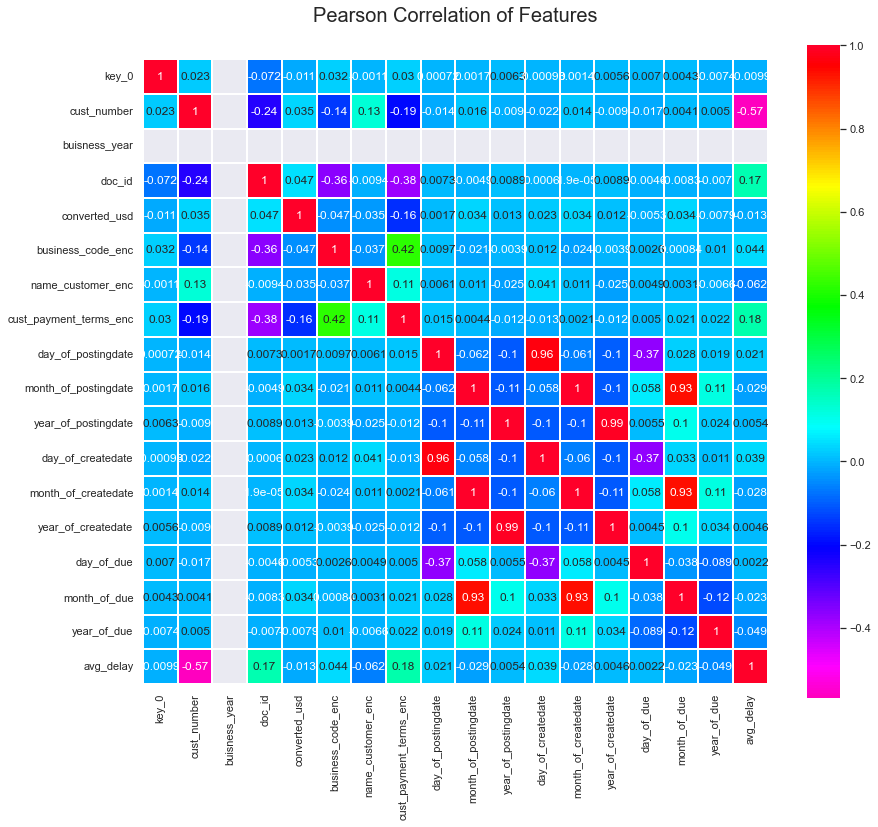

In [119]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=20)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap='gist_rainbow_r', linecolor='white', annot=True)

#### Calling variance threshold for threshold value = 0.8

- Note -  Fill in the blanks to call the appropriate method

In [120]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(0.8)
sel.fit(X_train)

VarianceThreshold(threshold=0.8)

In [121]:
sel.variances_

array([1.73580712e+15, 0.00000000e+00, 5.21563597e+16, 1.30744471e+09,
       2.52311371e-01, 1.03681235e+06, 1.27550957e+02, 7.61055441e+01,
       1.09128983e+01, 3.73160739e-03, 7.79531457e+01, 1.09183288e+01,
       3.73160739e-03, 7.63517293e+01, 1.08675351e+01, 4.91550927e-03])

### Features columns are 
- 'year_of_createdate' 
- 'year_of_due'
- 'day_of_createdate'
- 'year_of_postingdate'
- 'month_of_due'
- 'month_of_createdate'

# Modelling 

#### Now you need to compare with different machine learning models, and needs to find out the best predicted model

- Linear Regression
- Decision Tree Regression
- Random Forest Regression
- Support Vector Regression
- Extreme Gradient Boost Regression 

### You need to make different blank list for different evaluation matrix 

- MSE
- R2
- Algorithm

In [122]:
MSE_Score = []
R2_Score = []
Algorithm = []
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### You need to start with the baseline model Linear Regression

- Step 1 : Call the Linear Regression from sklearn library
- Step 2 : make an object of Linear Regression 
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [123]:
from sklearn.linear_model import LinearRegression
Algorithm.append('LinearRegression')
regressor = LinearRegression()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [124]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [125]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

653417.41814251

### Display The Comparison Lists

In [126]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression'],[338458072501.5514],[0.2315798220660482],

### You need to start with the baseline model Support Vector Regression

- Step 1 : Call the Support Vector Regressor from sklearn library
- Step 2 : make an object of SVR
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [127]:
# Fitting SVR to the Training Set
Algorithm.append('Support Vector Regression')
clf = SVR()
clf.fit(X_train, y_train)

# Predicting the Test Set Results
predicted = clf.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for "y_test" and "predicted" dataset and store those data inside respective list for comparison 

In [128]:
# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [129]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

653417.41814251

### Display The Comparison Lists

In [130]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'Support Vector Regression'],[338458072501.5514, 443135578133.36914],[0.2315798220660482, -0.006075338316970713],

### Your next model would be Decision Tree Regression

- Step 1 : Call the Decision Tree Regressor from sklearn library
- Step 2 : make an object of Decision Tree
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [131]:
# Fitting Decision Tree to the Training Set
Algorithm.append('Decision Tree Regressor')
clf = DecisionTreeRegressor()
clf.fit(X_train, y_train)

# Predicting the Test Set Results
predicted = clf.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [132]:
# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [133]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

653417.41814251

### Display The Comparison Lists

In [134]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'Support Vector Regression', 'Decision Tree Regressor'],[338458072501.5514, 443135578133.36914, 270226939592.16345],[0.2315798220660482, -0.006075338316970713, 0.38648875629046875],

### Your next model would be Random Forest Regression

- Step 1 : Call the Random Forest Regressor from sklearn library
- Step 2 : make an object of Random Forest
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [135]:
# Fitting Random Forest Regressor Tree to the Training Set
Algorithm.append('Random Forest Regressor')
clf = RandomForestRegressor()
clf.fit(X_train, y_train)

# Predicting the Test Set Results
predicted = clf.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [136]:
# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [137]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

653417.41814251

### Display The Comparison Lists


In [138]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'Support Vector Regression', 'Decision Tree Regressor', 'Random Forest Regressor'],[338458072501.5514, 443135578133.36914, 270226939592.16345, 110451863564.0887],[0.2315798220660482, -0.006075338316970713, 0.38648875629046875, 0.7492349937888848],

### The last but not the least model would be XGBoost or Extreme Gradient Boost Regression

- Step 1 : Call the XGBoost Regressor from xgb library
- Step 2 : make an object of Xgboost
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose### Extreme Gradient Boost Regression
- Note -  No need to change the code 

In [139]:
import xgboost as xgb
Algorithm.append('XGB Regressor')
regressor = xgb.XGBRegressor()
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [140]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

432310.4770026551

In [141]:
# Appending the Scores For Visualisation at a Later Part
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [142]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

432310.4770026551

### Display The Comparison Lists


In [143]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'Support Vector Regression', 'Decision Tree Regressor', 'Random Forest Regressor', 'XGB Regressor'],[338458072501.5514, 443135578133.36914, 270226939592.16345, 110451863564.0887, 159221436014.0023],[0.2315798220660482, -0.006075338316970713, 0.38648875629046875, 0.7492349937888848, 0.6385107222040977],

## You need to make the comparison list into a comparison dataframe 

In [144]:
comparision = []
for i in Algorithm, MSE_Score, R2_Score:
    comparision.append(i)
    print(i,end=',')

['LinearRegression', 'Support Vector Regression', 'Decision Tree Regressor', 'Random Forest Regressor', 'XGB Regressor'],[338458072501.5514, 443135578133.36914, 270226939592.16345, 110451863564.0887, 159221436014.0023],[0.2315798220660482, -0.006075338316970713, 0.38648875629046875, 0.7492349937888848, 0.6385107222040977],

In [145]:
comparision = pd.DataFrame(list(zip(Algorithm, MSE_Score, R2_Score)), columns = ['Algorithm', 'MSE_Score', 'R2_Score'])
comparision

,Algorithm,MSE_Score,R2_Score
0,LinearRegression,3.384581e+11,0.231580
1,Support Vector Regression,4.431356e+11,-0.006075
2,Decision Tree Regressor,2.702269e+11,0.386489
3,Random Forest Regressor,1.104519e+11,0.749235
4,XGB Regressor,1.592214e+11,0.638511


## Now from the Comparison table, you need to choose the best fit model

- Step 1 - Fit X_train and y_train inside the model 
- Step 2 - Predict the X_test dataset
- Step 3 - Predict the X_val dataset


- Note - No need to change the code

In [146]:
regressorfinal = RandomForestRegressor()
regressorfinal.fit(X_train, y_train)
predictedfinal = regressorfinal.predict(X_test)
predict_testfinal = regressorfinal.predict(X_val)

### Calculate the Mean Square Error for test dataset

- Note - No need to change the code

In [147]:
mean_squared_error(y_test,predictedfinal,squared=False)

340578.3431479698

### Calculate the mean Square Error for validation dataset

In [148]:
mean_squared_error(y_val,predict_testfinal,squared=False)

415259.90935034736

### Calculate the R2 score for test

In [149]:
r2_score(y_test,predictedfinal)

0.736653263718728

### Calculate the R2 score for Validation

In [150]:
r2_score(y_val,predict_testfinal)

0.6864430237222862

### Calculate the Accuracy for train Dataset 

In [151]:
regressorfinal.score(X_train, y_train)*100

97.12195938592377

### Calculate the accuracy for validation

In [152]:
regressorfinal.score(X_val, y_val)*100

68.64430237222862

### Calculate the accuracy for test

In [153]:
regressorfinal.score(X_test, y_test)*100

73.6653263718728

## Specify the reason behind choosing your machine learning model 

- Note : Provide your answer as a text here

---


The Random Forest model had the best results for MSE score and R2 score, as shown above in the comparison table.

## Now you need to pass the Nulldata dataframe into this machine learning model

#### In order to pass this Nulldata dataframe into the ML model, we need to perform the following

- Step 1 : Label Encoding 
- Step 2 : Day, Month and Year extraction 
- Step 3 : Change all the column data type into int64 or float64
- Step 4 : Need to drop the useless columns 

### Display the Nulldata 

In [154]:
nulldata

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
37588,U001,0200744019,TARG associates,NaT,2020.0,1.930619e+09,2020-03-08,2020-03-23,2020-03-08,NAA8,7664.54
37793,U001,0200418007,AM trust,NaT,2020.0,1.930850e+09,2020-05-06,2020-05-21,2020-05-06,NAA8,11638.80
44616,U001,0200875006,KROGER us,NaT,2020.0,1.930819e+09,2020-04-23,2020-05-08,2020-04-23,NAA8,63607.17
43286,U001,0200762301,C&S WH llc,NaT,2020.0,1.930789e+09,2020-04-16,2020-05-01,2020-04-16,NAC6,7614.94
43277,U001,CCCA02,KRAFT associates,NaT,2020.0,1.930651e+09,2020-03-21,2020-04-25,2020-03-21,NAG2,55736.45
...,...,...,...,...,...,...,...,...,...,...,...
23380,U001,0200747369,SCHNU us,NaT,2020.0,1.930791e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,61379.78
23378,U001,0200794332,COST corporation,NaT,2020.0,1.930794e+09,2020-04-16,2020-05-01,2020-04-16,NAAX,38345.98
23376,U001,0200762301,C&S WH corp,NaT,2020.0,1.930720e+09,2020-04-01,2020-04-16,2020-04-01,NAC6,95005.20
23368,U001,0200769623,WAL-MAR us,NaT,2020.0,1.930720e+09,2020-04-01,2020-04-16,2020-04-01,NAH4,14384.37


### Check for the number of rows and columns in the nulldata

In [155]:
nulldata.shape

(9681, 11)

### Check the Description and Information of the nulldata 

In [156]:
nulldata.describe()

,buisness_year,doc_id,converted_usd
count,9681.0,9.681000e+03,9681.000000
mean,2020.0,2.006165e+09,32065.681125
std,0.0,2.673629e+08,35419.613688
min,2020.0,1.930535e+09,0.720000
25%,2020.0,1.930658e+09,5607.190000
50%,2020.0,1.930731e+09,19024.190000
75%,2020.0,1.930818e+09,47752.640000
max,2020.0,2.960636e+09,653644.800000


In [157]:
nulldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9681 entries, 37588 to 23250
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         9681 non-null   object        
 1   cust_number           9681 non-null   object        
 2   name_customer         9681 non-null   object        
 3   clear_date            0 non-null      datetime64[ns]
 4   buisness_year         9681 non-null   float64       
 5   doc_id                9681 non-null   float64       
 6   posting_date          9681 non-null   datetime64[ns]
 7   due_in_date           9681 non-null   datetime64[ns]
 8   baseline_create_date  9681 non-null   datetime64[ns]
 9   cust_payment_terms    9681 non-null   object        
 10  converted_usd         9681 non-null   float64       
dtypes: datetime64[ns](4), float64(3), object(4)
memory usage: 907.6+ KB


### Storing the Nulldata into a different dataset 
# for BACKUP

In [158]:
nulldata1 = nulldata.copy()

### Call the Label Encoder for Nulldata

- Note - you are expected to fit "business_code" as it is a categorical variable
- Note - No need to change the code

In [159]:
from sklearn.preprocessing import LabelEncoder
business_codern = LabelEncoder()
business_codern.fit(nulldata['business_code'])
nulldata['business_code_enc'] = business_codern.transform(nulldata['business_code'])

### Now you need to manually replacing str values with numbers
- Note - No need to change the code

In [160]:
nulldata['cust_number'] = nulldata['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)

## You need to extract day, month and year from the "clear_date", "posting_date", "due_in_date", "baseline_create_date" columns


##### 1.   Extract day from "clear_date" column and store it into 'day_of_cleardate'
##### 2.   Extract month from "clear_date" column and store it into 'month_of_cleardate'
##### 3.   Extract year from "clear_date" column and store it into 'year_of_cleardate'



##### 4.   Extract day from "posting_date" column and store it into 'day_of_postingdate'
##### 5.   Extract month from "posting_date" column and store it into 'month_of_postingdate'
##### 6.   Extract year from "posting_date" column and store it into 'year_of_postingdate'




##### 7.   Extract day from "due_in_date" column and store it into 'day_of_due'
##### 8.   Extract month from "due_in_date" column and store it into 'month_of_due'
##### 9.   Extract year from "due_in_date" column and store it into 'year_of_due'




##### 10.   Extract day from "baseline_create_date" column and store it into 'day_of_createdate'
##### 11.   Extract month from "baseline_create_date" column and store it into 'month_of_createdate'
##### 12.   Extract year from "baseline_create_date" column and store it into 'year_of_createdate'




- Note - You are supposed To use - 

*   dt.day
*   dt.month
*   dt.year

In [161]:
nulldata['day_of_cleardate'] = nulldata["clear_date"].dt.day
nulldata['month_of_cleardate'] = nulldata["clear_date"].dt.month
nulldata['year_of_cleardate'] = nulldata["clear_date"].dt.year


nulldata['day_of_postingdate'] = nulldata['posting_date'].dt.day
nulldata['month_of_postingdate'] = nulldata['posting_date'].dt.month
nulldata['year_of_postingdate'] = nulldata['posting_date'].dt.year


nulldata['day_of_due'] = nulldata['due_in_date'].dt.day
nulldata['month_of_due'] = nulldata['due_in_date'].dt.month
nulldata['year_of_due'] = nulldata['due_in_date'].dt.year


nulldata['day_of_createdate'] = nulldata['baseline_create_date'].dt.day
nulldata['month_of_createdate'] = nulldata['baseline_create_date'].dt.month
nulldata['year_of_createdate'] = nulldata['baseline_create_date'].dt.year



### Use Label Encoder1 of all the following columns - 
- 'cust_payment_terms' and store into 'cust_payment_terms_enc'
- 'business_code' and store into 'business_code_enc'
- 'name_customer' and store into 'name_customer_enc'

Note - No need to change the code

In [162]:
nulldata['cust_payment_terms_enc']=label_encoder1.transform(nulldata['cust_payment_terms'])
nulldata['business_code_enc']=label_encoder1.transform(nulldata['business_code'])
nulldata['name_customer_enc']=label_encoder.transform(nulldata['name_customer'])


### Check for the datatypes of all the columns of Nulldata

In [163]:
nulldata.dtypes

business_code                     object
cust_number                        int32
name_customer                     object
clear_date                datetime64[ns]
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
cust_payment_terms                object
converted_usd                    float64
business_code_enc                  int32
day_of_cleardate                 float64
month_of_cleardate               float64
year_of_cleardate                float64
day_of_postingdate                 int64
month_of_postingdate               int64
year_of_postingdate                int64
day_of_due                         int64
month_of_due                       int64
year_of_due                        int64
day_of_createdate                  int64
month_of_createdate                int64
year_of_createdate                 int64
cust_payment_ter

### Now you need to drop all the unnecessary columns - 

- 'business_code'
- "baseline_create_date"
- "due_in_date"
- "posting_date"
- "name_customer"
- "clear_date"
- "cust_payment_terms"
- 'day_of_cleardate'
- "month_of_cleardate"
- "year_of_cleardate"

In [164]:
nulldata.drop(axis = 1, inplace = True, labels = ['business_code',"baseline_create_date","due_in_date","posting_date","name_customer","clear_date","cust_payment_terms",'day_of_cleardate',"month_of_cleardate","year_of_cleardate"])

### Check the information of the "nulldata" dataframe

In [165]:
nulldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9681 entries, 37588 to 23250
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cust_number             9681 non-null   int32  
 1   buisness_year           9681 non-null   float64
 2   doc_id                  9681 non-null   float64
 3   converted_usd           9681 non-null   float64
 4   business_code_enc       9681 non-null   int32  
 5   day_of_postingdate      9681 non-null   int64  
 6   month_of_postingdate    9681 non-null   int64  
 7   year_of_postingdate     9681 non-null   int64  
 8   day_of_due              9681 non-null   int64  
 9   month_of_due            9681 non-null   int64  
 10  year_of_due             9681 non-null   int64  
 11  day_of_createdate       9681 non-null   int64  
 12  month_of_createdate     9681 non-null   int64  
 13  year_of_createdate      9681 non-null   int64  
 14  cust_payment_terms_enc  9681 non-nu

### Compare "nulldata" with the "X_test" dataframe 

- use info() method

In [166]:
nulldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9681 entries, 37588 to 23250
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cust_number             9681 non-null   int32  
 1   buisness_year           9681 non-null   float64
 2   doc_id                  9681 non-null   float64
 3   converted_usd           9681 non-null   float64
 4   business_code_enc       9681 non-null   int32  
 5   day_of_postingdate      9681 non-null   int64  
 6   month_of_postingdate    9681 non-null   int64  
 7   year_of_postingdate     9681 non-null   int64  
 8   day_of_due              9681 non-null   int64  
 9   month_of_due            9681 non-null   int64  
 10  year_of_due             9681 non-null   int64  
 11  day_of_createdate       9681 non-null   int64  
 12  month_of_createdate     9681 non-null   int64  
 13  year_of_createdate      9681 non-null   int64  
 14  cust_payment_terms_enc  9681 non-nu

In [167]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7832 entries, 46398 to 22554
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cust_number             7832 non-null   int32  
 1   buisness_year           7832 non-null   float64
 2   doc_id                  7832 non-null   float64
 3   converted_usd           7832 non-null   float64
 4   business_code_enc       7832 non-null   int32  
 5   name_customer_enc       7832 non-null   int32  
 6   cust_payment_terms_enc  7832 non-null   int32  
 7   day_of_postingdate      7832 non-null   int64  
 8   month_of_postingdate    7832 non-null   int64  
 9   year_of_postingdate     7832 non-null   int64  
 10  day_of_createdate       7832 non-null   int64  
 11  month_of_createdate     7832 non-null   int64  
 12  year_of_createdate      7832 non-null   int64  
 13  day_of_due              7832 non-null   int64  
 14  month_of_due            7832 non-nu

### You must have noticed that there is a mismatch in the column sequence while compairing the dataframes

- Note - In order to fed into the machine learning model, you need to edit the sequence of "nulldata", similar to the "X_test" dataframe

- Display all the columns of the X_test dataframe 
- Display all the columns of the Nulldata dataframe 
- Store the Nulldata with new sequence into a new dataframe 


- Note - The code is given below, no need to change 

In [168]:
X_test.columns

Index(['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
       'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'day_of_due', 'month_of_due', 'year_of_due'],
      dtype='object')

In [169]:
nulldata.columns

Index(['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'day_of_postingdate', 'month_of_postingdate',
       'year_of_postingdate', 'day_of_due', 'month_of_due', 'year_of_due',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'cust_payment_terms_enc', 'name_customer_enc'],
      dtype='object')

In [170]:
nulldata2=nulldata[['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
       'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'day_of_due', 'month_of_due', 'year_of_due']]

### Display the Final Dataset

In [171]:
nulldata2

,cust_number,buisness_year,doc_id,converted_usd,business_code_enc,name_customer_enc,cust_payment_terms_enc,day_of_postingdate,month_of_postingdate,year_of_postingdate,day_of_createdate,month_of_createdate,year_of_createdate,day_of_due,month_of_due,year_of_due
37588,200744019,2020.0,1.930619e+09,7664.54,66,2718,19,8,3,2020,8,3,2020,23,3,2020
37793,200418007,2020.0,1.930850e+09,11638.80,66,92,19,6,5,2020,6,5,2020,21,5,2020
44616,200875006,2020.0,1.930819e+09,63607.17,66,1540,19,23,4,2020,23,4,2020,8,5,2020
43286,200762301,2020.0,1.930789e+09,7614.94,66,417,25,16,4,2020,16,4,2020,1,5,2020
43277,102,2020.0,1.930651e+09,55736.45,66,1467,31,21,3,2020,21,3,2020,25,4,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23380,200747369,2020.0,1.930791e+09,61379.78,66,2373,19,15,4,2020,15,4,2020,30,4,2020
23378,200794332,2020.0,1.930794e+09,38345.98,66,587,21,16,4,2020,16,4,2020,1,5,2020
23376,200762301,2020.0,1.930720e+09,95005.20,66,413,25,1,4,2020,1,4,2020,16,4,2020
23368,200769623,2020.0,1.930720e+09,14384.37,66,2929,33,1,4,2020,1,4,2020,16,4,2020


### Now you can pass this dataset into you final model and store it into "final_result"

In [172]:
final_result = regressorfinal.predict(nulldata2)

### you need to make the final_result as dataframe, with a column name "avg_delay"

- Note - No need to change the code

In [173]:
final_result = pd.Series(final_result,name='avg_delay')

### Display the "avg_delay" column

In [174]:
final_result

0       193101.124903
1      -885814.145628
2        58099.795790
3         8000.000000
4       693102.241181
            ...      
9676    406126.954645
9677      7405.714286
9678   -172800.000000
9679   -194557.664234
9680    140896.800000
Name: avg_delay, Length: 9681, dtype: float64

### Now you need to merge this final_result dataframe with the BACKUP of "nulldata" Dataframe which we have created in earlier steps

In [175]:
nulldata1.reset_index(drop=True,inplace=True)
Final = nulldata1.merge(final_result , on = nulldata.index )

### Display the "Final" dataframe 

In [176]:
Final

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,avg_delay
0,37588,U001,0200744019,TARG associates,NaT,2020.0,1.930619e+09,2020-03-08,2020-03-23,2020-03-08,NAA8,7664.54,193101.124903
1,37793,U001,0200418007,AM trust,NaT,2020.0,1.930850e+09,2020-05-06,2020-05-21,2020-05-06,NAA8,11638.80,-885814.145628
2,44616,U001,0200875006,KROGER us,NaT,2020.0,1.930819e+09,2020-04-23,2020-05-08,2020-04-23,NAA8,63607.17,58099.795790
3,43286,U001,0200762301,C&S WH llc,NaT,2020.0,1.930789e+09,2020-04-16,2020-05-01,2020-04-16,NAC6,7614.94,8000.000000
4,43277,U001,CCCA02,KRAFT associates,NaT,2020.0,1.930651e+09,2020-03-21,2020-04-25,2020-03-21,NAG2,55736.45,693102.241181
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9676,23380,U001,0200747369,SCHNU us,NaT,2020.0,1.930791e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,61379.78,406126.954645
9677,23378,U001,0200794332,COST corporation,NaT,2020.0,1.930794e+09,2020-04-16,2020-05-01,2020-04-16,NAAX,38345.98,7405.714286
9678,23376,U001,0200762301,C&S WH corp,NaT,2020.0,1.930720e+09,2020-04-01,2020-04-16,2020-04-01,NAC6,95005.20,-172800.000000
9679,23368,U001,0200769623,WAL-MAR us,NaT,2020.0,1.930720e+09,2020-04-01,2020-04-16,2020-04-01,NAH4,14384.37,-194557.664234


### Check for the Number of Rows and Columns in your "Final" dataframe 

In [177]:
Final.shape

(9681, 13)

### Now, you need to do convert the below fields back into date and time format 

- Convert "due_in_date" into datetime format
- Convert "avg_delay" into datetime format
- Create a new column "clear_date" and store the sum of "due_in_date" and "avg_delay"
- display the new "clear_date" column
- Note - Code is given below, no need to change 

In [178]:
Final['clear_date'] = pd.to_datetime(Final['due_in_date']) + pd.to_timedelta(Final['avg_delay'], unit='s')

### Display the "clear_date" column

In [179]:
Final['clear_date']

0      2020-03-25 05:38:21.124903265
1      2020-05-10 17:56:25.854372019
2      2020-05-08 16:08:19.795789624
3      2020-05-01 02:13:20.000000000
4      2020-05-03 00:31:42.241181295
                    ...             
9676   2020-05-04 16:48:46.954645355
9677   2020-05-01 02:03:25.714285714
9678   2020-04-14 00:00:00.000000000
9679   2020-04-13 17:57:22.335766424
9680   2020-04-11 15:08:16.800000000
Name: clear_date, Length: 9681, dtype: datetime64[ns]

### Convert the average delay into number of days format 

- Note - Formula = avg_delay//(24 * 3600)
- Note - full code is given for this, no need to change 

In [180]:
Final['avg_delay'] = Final.apply(lambda row: row.avg_delay//(24 * 3600), axis = 1)

### Display the "avg_delay" column 

In [181]:
Final['avg_delay']

0        2.0
1      -11.0
2        0.0
3        0.0
4        8.0
        ... 
9676     4.0
9677     0.0
9678    -2.0
9679    -3.0
9680     1.0
Name: avg_delay, Length: 9681, dtype: float64

### Now you need to convert average delay column into bucket

- Need to perform binning 
- create a list of bins i.e. bins= [0,15,30,45,60,100]
- create a list of labels i.e. labels = ['0-15','16-30','31-45','46-60','Greatar than 60']
- perform binning by using cut() function from "Final" dataframe


- Please fill up the first two rows of the code

In [182]:

bins= [-100,0,15,30,45,60,100]
labels = ['less than zero','0-15','16-30','31-45','46-60','Greatar than 60']
Final['Aging Bucket'] = pd.cut(Final['avg_delay'], bins=bins, labels=labels, right=False)

### Now you need to drop "key_0" and "avg_delay" columns from the "Final" Dataframe

In [183]:
Final.drop(axis = 1, inplace = True, labels = ['key_0','avg_delay'])

### Display the count of each categoty of new "Aging Bucket" column 

In [184]:
Final['Aging Bucket'].value_counts()

less than zero     5219
0-15               4374
31-45                69
16-30                12
46-60                 7
Greatar than 60       0
Name: Aging Bucket, dtype: int64

In [185]:
Final.dtypes

business_code                   object
cust_number                     object
name_customer                   object
clear_date              datetime64[ns]
buisness_year                  float64
doc_id                         float64
posting_date            datetime64[ns]
due_in_date             datetime64[ns]
baseline_create_date    datetime64[ns]
cust_payment_terms              object
converted_usd                  float64
Aging Bucket                  category
dtype: object

### Display your final dataset with aging buckets 

In [186]:
Final

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Aging Bucket
0,U001,0200744019,TARG associates,2020-03-25 05:38:21.124903265,2020.0,1.930619e+09,2020-03-08,2020-03-23,2020-03-08,NAA8,7664.54,0-15
1,U001,0200418007,AM trust,2020-05-10 17:56:25.854372019,2020.0,1.930850e+09,2020-05-06,2020-05-21,2020-05-06,NAA8,11638.80,less than zero
2,U001,0200875006,KROGER us,2020-05-08 16:08:19.795789624,2020.0,1.930819e+09,2020-04-23,2020-05-08,2020-04-23,NAA8,63607.17,0-15
3,U001,0200762301,C&S WH llc,2020-05-01 02:13:20.000000000,2020.0,1.930789e+09,2020-04-16,2020-05-01,2020-04-16,NAC6,7614.94,0-15
4,U001,CCCA02,KRAFT associates,2020-05-03 00:31:42.241181295,2020.0,1.930651e+09,2020-03-21,2020-04-25,2020-03-21,NAG2,55736.45,0-15
...,...,...,...,...,...,...,...,...,...,...,...,...
9676,U001,0200747369,SCHNU us,2020-05-04 16:48:46.954645355,2020.0,1.930791e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,61379.78,0-15
9677,U001,0200794332,COST corporation,2020-05-01 02:03:25.714285714,2020.0,1.930794e+09,2020-04-16,2020-05-01,2020-04-16,NAAX,38345.98,0-15
9678,U001,0200762301,C&S WH corp,2020-04-14 00:00:00.000000000,2020.0,1.930720e+09,2020-04-01,2020-04-16,2020-04-01,NAC6,95005.20,less than zero
9679,U001,0200769623,WAL-MAR us,2020-04-13 17:57:22.335766424,2020.0,1.930720e+09,2020-04-01,2020-04-16,2020-04-01,NAH4,14384.37,less than zero


In [187]:
Final.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Aging Bucket
0,U001,0200744019,TARG associates,2020-03-25 05:38:21.124903265,2020.0,1.930619e+09,2020-03-08,2020-03-23,2020-03-08,NAA8,7664.54,0-15
1,U001,0200418007,AM trust,2020-05-10 17:56:25.854372019,2020.0,1.930850e+09,2020-05-06,2020-05-21,2020-05-06,NAA8,11638.80,less than zero
2,U001,0200875006,KROGER us,2020-05-08 16:08:19.795789624,2020.0,1.930819e+09,2020-04-23,2020-05-08,2020-04-23,NAA8,63607.17,0-15
3,U001,0200762301,C&S WH llc,2020-05-01 02:13:20.000000000,2020.0,1.930789e+09,2020-04-16,2020-05-01,2020-04-16,NAC6,7614.94,0-15
4,U001,CCCA02,KRAFT associates,2020-05-03 00:31:42.241181295,2020.0,1.930651e+09,2020-03-21,2020-04-25,2020-03-21,NAG2,55736.45,0-15


In [188]:
Final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9681 entries, 0 to 9680
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         9681 non-null   object        
 1   cust_number           9681 non-null   object        
 2   name_customer         9681 non-null   object        
 3   clear_date            9681 non-null   datetime64[ns]
 4   buisness_year         9681 non-null   float64       
 5   doc_id                9681 non-null   float64       
 6   posting_date          9681 non-null   datetime64[ns]
 7   due_in_date           9681 non-null   datetime64[ns]
 8   baseline_create_date  9681 non-null   datetime64[ns]
 9   cust_payment_terms    9681 non-null   object        
 10  converted_usd         9681 non-null   float64       
 11  Aging Bucket          9681 non-null   category      
dtypes: category(1), datetime64[ns](4), float64(3), object(4)
memory usage: 917.3

### Store this dataframe into the .csv format

In [189]:
Final.to_csv('Final.csv',date_format ='%Y-%m-%d')

# END OF THE PROJECT